In [92]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

In [93]:
X, y = load_diabetes(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

In [94]:
# print(X_train, y_train)
print(X_train.shape)

(331, 10)


In [95]:
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=[10,]), #input layer | input_shape는 feature가 몇 개인지 확인해서 반영
  keras.layers.Dense(units=1) # layer 개수 : 1개  | 보통 가중치가 반영되는 hidden layer을 의미
])

# print(model.summary())
model.compile(optimizer=tf.optimizers.Adam(), loss="mse")
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
11/11 [==============================] - 0s 778us/step - loss: 29248.4473
Epoch 2/50
11/11 [==============================] - 0s 698us/step - loss: 29244.8223
Epoch 3/50
11/11 [==============================] - 0s 698us/step - loss: 29241.2500
Epoch 4/50
11/11 [==============================] - 0s 798us/step - loss: 29237.6953
Epoch 5/50
11/11 [==============================] - 0s 698us/step - loss: 29234.1094
Epoch 6/50
11/11 [==============================] - 0s 698us/step - loss: 29230.4902
Epoch 7/50
11/11 [==============================] - 0s 798us/step - loss: 29226.8848
Epoch 8/50
11/11 [==============================] - 0s 698us/step - loss: 29223.2812
Epoch 9/50
11/11 [==============================] - 0s 698us/step - loss: 29219.7402
Epoch 10/50
11/11 [==============================] - 0s 698us/step - loss: 29216.1270
Epoch 11/50
11/11 [==============================] - 0s 800us/step - loss: 29212.4961
Epoch 12/50
11/11 [==============================] - 0s 596us/s

In [96]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

X, y = load_diabetes(return_X_y=True)

X = X[:, 2] # bmi

X = X[:, np.newaxis]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10)

(331, 1)


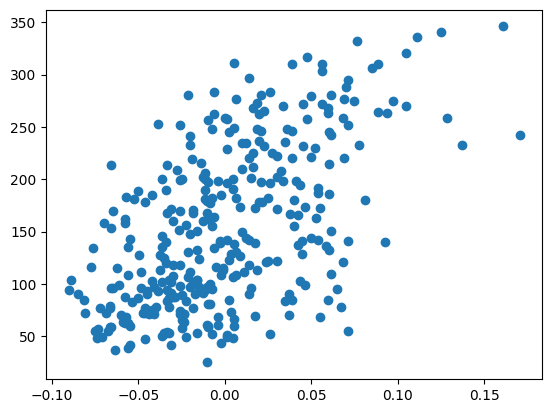

In [97]:
print(X_train.shape)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)

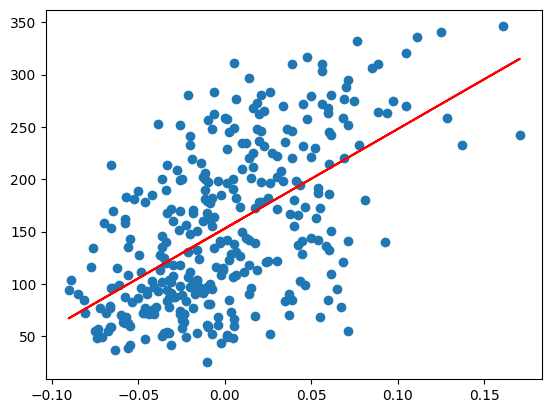

In [98]:
m = LinearRegression().fit(X_train, y_train)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.plot(X_train, m.predict(X_train), c='r')

11/11 [==============================] - 0s 635us/step


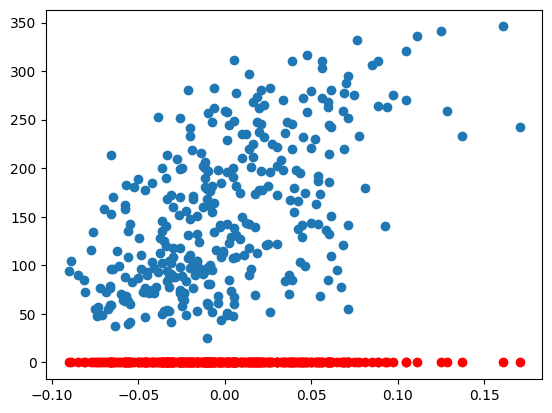

In [99]:
# perceptron이 1개인 경우

# 파이프라인
model = keras.Sequential([
  keras.layers.InputLayer(input_shape=[1,]),
  keras.layers.Dense(units=1)
])

# model.summary() # param 개수 2개 : 기울기 1개, 절편 1개 (param 개수가 늘어날 경우 절편은 1개로 고정 나머지는 기울기 개수!)
# model.weights   # kernel : 기울기 또는 가중치를 의미 / bias : 절편 (1차원 배열)

# 예측값 확인 방법
# model.predict(X_train)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.scatter(X_train, model.predict(X_train), c='r')

11/11 [==============================] - 0s 638us/step


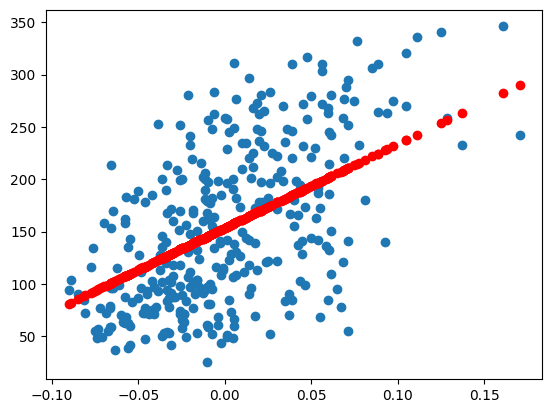

In [100]:
# model.compile(optimizer='adam', loss='mse') # 매개변수 수정 없이 적용하고 싶은 경우 활용하는 형태

# learning_rate : 기울기 조절 속도를 의미
model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse')  # 매개변수를 수정하기 위한 형태
model.fit(X_train, y_train, epochs=1000, verbose=0) # verbose : 중간 처리 과정을 보여주지 않음!

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.scatter(X_train, model.predict(X_train), c='r')

Epoch 1/100
11/11 [==============================] - 0s 898us/step - loss: 18159.7188
Epoch 2/100
11/11 [==============================] - 0s 898us/step - loss: 6006.1182
Epoch 3/100
11/11 [==============================] - 0s 798us/step - loss: 4965.9224
Epoch 4/100
11/11 [==============================] - 0s 1ms/step - loss: 4483.1943
Epoch 5/100
11/11 [==============================] - 0s 1ms/step - loss: 4186.2891
Epoch 6/100
11/11 [==============================] - 0s 1ms/step - loss: 4356.5210
Epoch 7/100
11/11 [==============================] - 0s 997us/step - loss: 3942.9380
Epoch 8/100
11/11 [==============================] - 0s 998us/step - loss: 3923.5098
Epoch 9/100
11/11 [==============================] - 0s 1ms/step - loss: 4217.7427
Epoch 10/100
11/11 [==============================] - 0s 798us/step - loss: 4229.3301
Epoch 11/100
11/11 [==============================] - 0s 1ms/step - loss: 4406.2495
Epoch 12/100
11/11 [==============================] - 0s 1ms/step - loss

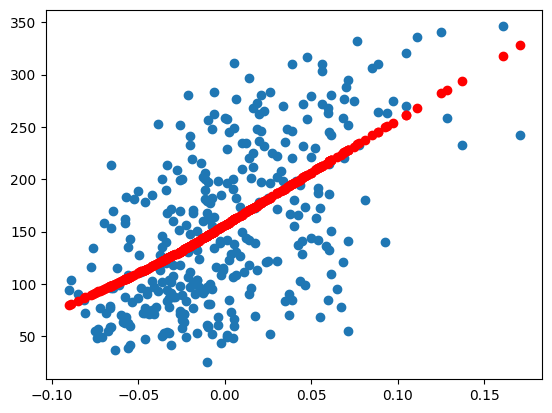

In [91]:
# DNN(심층 신경망) - LinearRegression
model2 = keras.Sequential([
  keras.layers.InputLayer(input_shape=[1,]),
  keras.layers.Dense(units=64, activation='relu'),
  keras.layers.Dense(units=32, activation='relu'),
  keras.layers.Dense(units=1)
])

# model2.summary() 
# model2.weights   

# 예측값 확인 방법
# model2.predict(X_train)



# 매개변수를 수정하기 위한 형태 (learning_rate : 기울기 조절 속도를 의미)
# model2.compile(optimizer=tf.optimizers.SGD(learning_rate=0.1), loss='mse')  
model2.compile(optimizer=tf.optimizers.Adam(learning_rate=0.1), loss='mse')

# model2.fit(X_train, y_train, epochs=1000, verbose=0) # verbose : 중간 처리 과정을 보여주지 않음!

# 리턴값 존재
history = model2.fit(X_train, y_train, epochs=100)

_, axe = plt.subplots()
axe.scatter(X_train, y_train)
axe.scatter(X_train, model2.predict(X_train), c='r')

model2.summary()

[18159.71875, 6006.1181640625, 4965.92236328125, 4483.1943359375, 4186.2890625, 4356.52099609375, 3942.93798828125, 3923.509765625, 4217.74267578125, 4229.330078125, 4406.24951171875, 3949.90478515625, 4012.36865234375, 4515.505859375, 4588.970703125, 4086.620849609375, 4023.548828125, 3945.452392578125, 3982.72509765625, 3927.4765625, 4090.353515625, 4502.140625, 4192.578125, 3926.305419921875, 3955.140380859375, 3903.72509765625, 4110.16796875, 4158.0556640625, 3907.55126953125, 4044.35498046875, 4031.214599609375, 4022.787353515625, 3998.384033203125, 3953.265380859375, 4018.8515625, 4251.85302734375, 4349.76513671875, 3893.689697265625, 4056.65966796875, 4365.47607421875, 3901.933837890625, 4249.73388671875, 3923.624267578125, 4044.17041015625, 3978.93994140625, 3998.0078125, 4096.37060546875, 3989.746337890625, 3945.999267578125, 3892.572509765625, 3892.125, 3874.876953125, 3997.518798828125, 3899.212158203125, 4545.37744140625, 4164.99609375, 3922.217529296875, 4322.197265625, 43

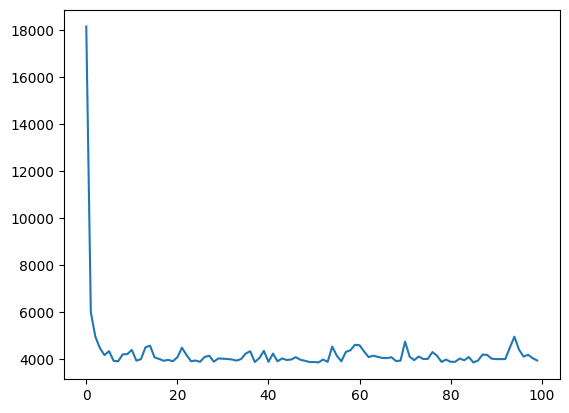

In [101]:
# print(history.history)
print(history.history['loss'])

_, axe = plt.subplots()

axe.plot(history.history['loss'])
